Measurement Type: TLM 
distances = (5, 10, 15, 20, 50), contact lenght = 50

Statistics for Fitting of R Values 
    d / µm | R²     | RT / Ohm
         5 | 0.9989 |    30.6326
        10 | 0.9980 |    80.8720
        15 | 0.9965 |   155.3048
        20 | 0.9946 |   224.1215
        50 | 0.9402 |   289.9275


--- --- Results --- ---
Path: C:\Users\gruis\Desktop\ctlm tests
Files: _TLM_1.txt, _TLM_2.txt, _TLM_3.txt, _TLM_4.txt, _TLM_5.txt 
 
Feld Rsh      R²     Rc       LT     rhoc      Distances 
-    [Ohm/sq] -      [Ohm mm] [µm]   [Ohm cm²] [µm] 
       266.12 0.8059     1.24   4.67  5.81e-05 [5, 10, 15, 20, 50]  
       654.90 0.9939    -1.02  -1.56  1.60e-05 [5, 10, 15, 20]      
       716.25 0.9995    -1.54  -2.14  3.29e-05 [10, 15, 20]         



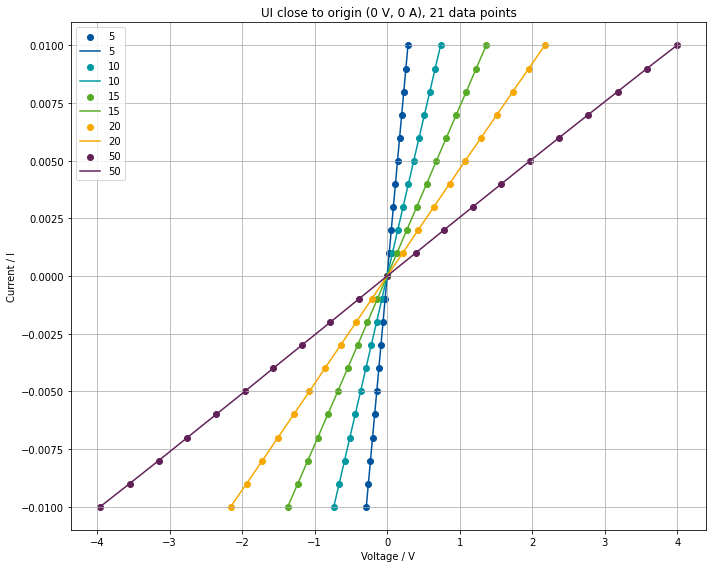

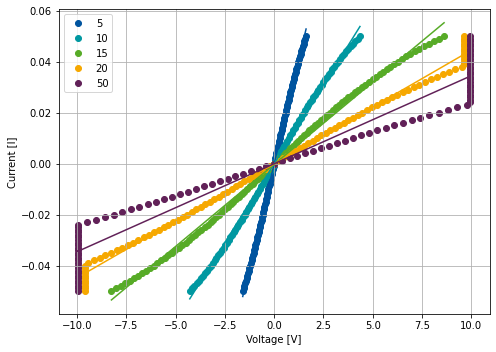

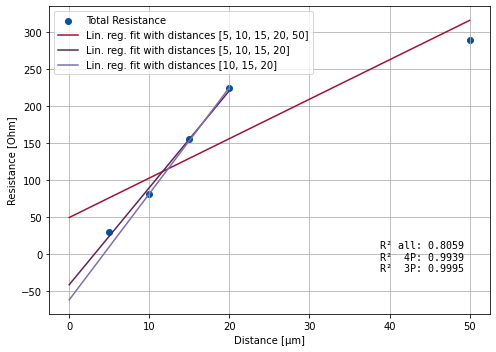

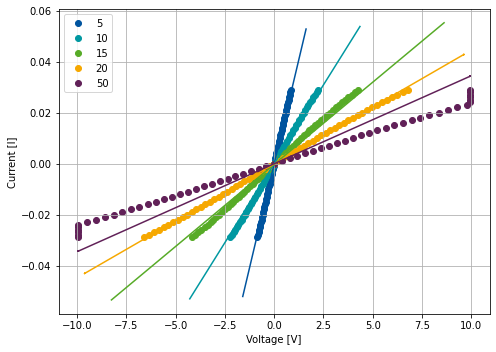

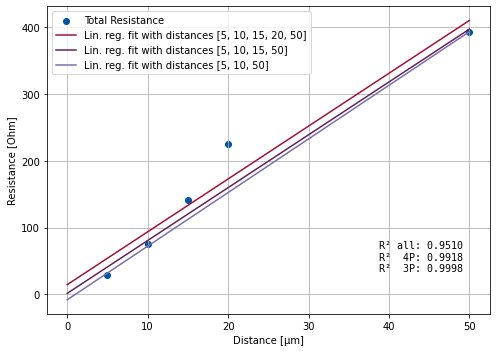

Statistics for Fitting of R Values 
    d / µm | R²     | RT / Ohm
         5 | 0.9999 |    29.1489
        10 | 0.9998 |    75.4632
        15 | 0.9996 |   141.6042
        20 | 0.9995 |   224.9231
        50 | 0.9959 |   393.0891 

Path: C:\Users\gruis\Desktop\ctlm tests
Files: _TLM_1.txt, _TLM_2.txt, _TLM_3.txt, _TLM_4.txt, _TLM_5.txt 
Evaluation only with current from -0.03 to -0.03
 
Feld Rsh      R²     Rc       LT     rhoc      Distances 
-    [Ohm/sq] -      [Ohm mm] [µm]   [Ohm cm²] [µm] 
       395.71 0.9510     0.36   0.92  3.35e-06 [5, 10, 15, 20, 50]  
       395.71 0.9918     0.04   0.10  3.75e-08 [5, 10, 15, 50]      
       401.56 0.9998    -0.20  -0.50  1.02e-06 [5, 10, 50]          
 



In [1]:
#%matplotlib widget
import ctlmevaluationlib
import pathlib
### ### ### Settings
directory = r'C:\Users\gruis\Desktop\ctlm tests'
filename = '_TLM' # field or filename w/o "_X.txt"

measurement_type  = "tlm"        # <--- "tlm" or "ctlm"
distances = ( 5, 10, 15, 20, 50) # in µm; ( 1, 2, 3, 4, 5 ) values in round parenthesis
contactlenght = 50               # in µm; only used by tlm 
inner_radius = 55                # in µm; only used by ctlm 

file_type = "new"                # <--- "new" or "old", "jupyter" or "labview"

refine = True                    # True or False
newrange = (-0.03, 0.03)         # only used when refine = True, two current (I) values in round parenthesis: (start, end)

graphs = True                    # True or False
graphsize = (7,5)                # in inch, (x, y) size

origin = True                    # True or False, closer look at data points close to origin (0 V, 0 A)
number = 10                       # datapoints close to origin (in each direction)
### ### ### Settings END

filelist = []
for i in range(1,6):
    x = pathlib.Path(directory, f"{filename}_{i}.txt")
    filelist.append(x)

#output = True
#measurement = ctlmevaluationlib.CTLMandTLMMeasurement(measurement_type, filelist, distances, contactlenght, inner_radius, output, file_type=file_type)
measurement = ctlmevaluationlib.CTLMandTLMMeasurement(measurement_type, filelist, distances, contactlenght, inner_radius, output=True, file_type=file_type)


if origin:
    measurement.plotclosetozero(number=number)
if graphs:
    measurement.uigraph(size=(7,5))
    measurement.rtgraph(size=(7,5))
if refine:
    measurement.refine_evaluated_range(newrange)
if refine and graphs:
    measurement.uigraph(size=(7,5))
    measurement.rtgraph(size=(7,5))
    print(measurement.R_statistics,"\n")
    print(measurement.results,"\n")